In [1]:
from microstruktur.signal_models import dispersed_models
from microstruktur.signal_models.three_dimensional_models import (
    PartialVolumeCombinedMicrostrukturModel)
from dipy.data import get_sphere
import numpy as np
from dipy.viz import fvtk
sphere = get_sphere()
vertices = sphere.vertices

watson_stick1 = dispersed_models.SD3I1WatsonDispersedStick()
watson_stick2 = dispersed_models.SD3I1WatsonDispersedStick()

mc_model = PartialVolumeCombinedMicrostrukturModel([watson_stick1, watson_stick2])
mc_model.parameter_cardinality

OrderedDict([('SD3I1WatsonDispersedStick_2_kappa', 1),
             ('SD3I1WatsonDispersedStick_2_lambda_par', 1),
             ('SD3I1WatsonDispersedStick_2_mu', 2),
             ('SD3I1WatsonDispersedStick_1_kappa', 1),
             ('SD3I1WatsonDispersedStick_1_lambda_par', 1),
             ('SD3I1WatsonDispersedStick_1_mu', 2),
             ('partial_volume_0', 1)])

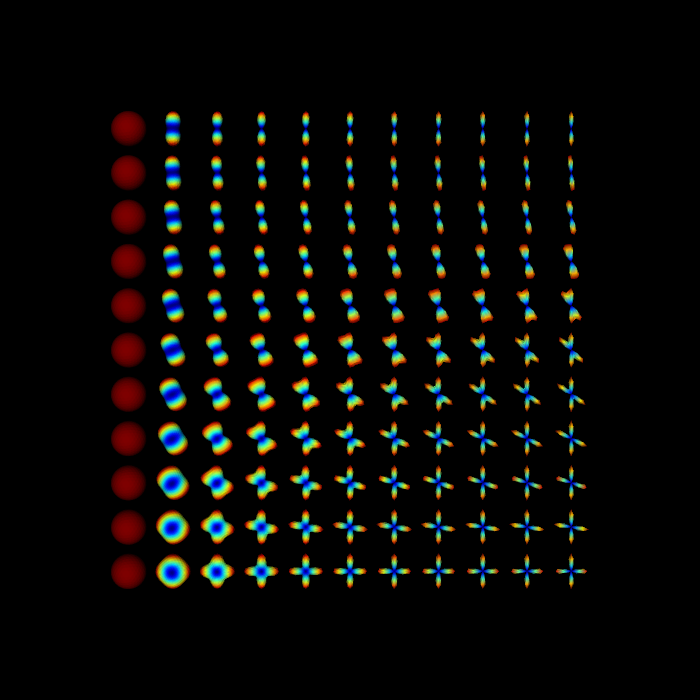

In [2]:
theta = np.linspace(0, np.pi / 2.0, 11)
kappa = np.linspace(0, 10, 11)
kappa_grid, theta_grid = np.meshgrid(kappa, theta)
phi_grid = np.zeros_like(theta_grid)
mu2_grid = np.concatenate(( theta_grid[..., None], phi_grid[..., None]), axis=-1)

kappa = 5.
lambda_par = 1.7e-9
mu2 = np.zeros((11, 2))
mu2[:, 0] = np.linspace(0, np.pi / 2., 11)
fraction = 0.5

param_vector = mc_model.parameters_to_parameter_vector(
    SD3I1WatsonDispersedStick_2_kappa = kappa_grid,
    SD3I1WatsonDispersedStick_2_lambda_par = lambda_par,
    SD3I1WatsonDispersedStick_2_mu = (0, 0),
    SD3I1WatsonDispersedStick_1_kappa = kappa_grid,
    SD3I1WatsonDispersedStick_1_lambda_par = lambda_par,
    SD3I1WatsonDispersedStick_1_mu = mu2_grid,
    partial_volume_0 = 0.5)

fods = mc_model.fod(vertices, param_vector)


fods = np.transpose(np.array([fods]), (2,0,1,3))
ren = fvtk.ren()
fod_spheres = fvtk.sphere_funcs(fods, sphere, scale=2.5, norm=True)
fod_spheres.RotateX(90)
fvtk.add(ren, fod_spheres)
fvtk.record(ren=ren, size=[700, 700])

from IPython.display import Image
Image(filename='dipy.png', width=700) 

In [3]:
from os import remove
remove('dipy.png')